In [738]:
import pandas as pd
from matplotlib import pyplot as plt
from plotnine import *
from wordcloud import WordCloud

In [739]:
data = pd.read_csv("data/netflix_titles.csv")

In [740]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [741]:
list(data.country.unique())

['United States',
 'South Africa',
 nan,
 'India',
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
 'United Kingdom',
 'Germany, Czech Republic',
 'Mexico',
 'Turkey',
 'Australia',
 'United States, India, France',
 'Finland',
 'China, Canada, United States',
 'South Africa, United States, Japan',
 'Nigeria',
 'Japan',
 'Spain, United States',
 'France',
 'Belgium',
 'United Kingdom, United States',
 'United States, United Kingdom',
 'France, United States',
 'South Korea',
 'Spain',
 'United States, Singapore',
 'United Kingdom, Australia, France',
 'United Kingdom, Australia, France, United States',
 'United States, Canada',
 'Germany, United States',
 'South Africa, United States',
 'United States, Mexico',
 'United States, Italy, France, Japan',
 'United States, Italy, Romania, United Kingdom',
 'Australia, United States',
 'Argentina, Venezuela',
 'United States, United Kingdom, Canada',
 'China, Hong Kong',
 'Russia',
 'Canada',
 'Hong Kong',
 'United St

In [742]:
data.date_added = pd.to_datetime(data.date_added)
data["year_added"] = data.date_added.dt.year
# make each list of countries its individual row 
data.country = data.country.str.split(", ")
exploded_data = data.explode("country")

In [743]:
exploded_data["country"] = exploded_data.country.str.strip(",")  # fix the issue where some countries have a ,

In [744]:
year_by_country = exploded_data.groupby(["year_added","country"]).size().reset_index(name="count")

In [745]:
year_by_country

,year_added,country,count
0,2008.0,United States,2
1,2009.0,Denmark,1
2,2009.0,United States,1
3,2010.0,United States,1
4,2011.0,France,2
...,...,...,...
466,2021.0,United Kingdom,120
467,2021.0,United States,627
468,2021.0,Uruguay,2
469,2021.0,Venezuela,1


In [746]:
year_by_country = year_by_country.query("country!=''")

In [747]:
year_by_country.country.unique()

array(['United States', 'Denmark', 'France', 'Mexico', 'Spain',
       'United Kingdom', 'Canada', 'Ireland', 'Bermuda', 'Ecuador',
       'Egypt', 'Hungary', 'Norway', 'Australia', 'Belgium', 'China',
       'Germany', 'Italy', 'Japan', 'New Zealand', 'Nigeria', 'Ukraine',
       'Argentina', 'Austria', 'Azerbaijan', 'Brazil', 'Chile',
       'Colombia', 'Croatia', 'Cuba', 'Finland', 'Greece', 'Hong Kong',
       'Iceland', 'India', 'Indonesia', 'Israel', 'Jordan', 'Kazakhstan',
       'Montenegro', 'Netherlands', 'Pakistan', 'Peru', 'Poland', 'Qatar',
       'Russia', 'Serbia', 'Slovenia', 'South Africa', 'South Korea',
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey',
       'United Arab Emirates', 'Zimbabwe', 'Afghanistan', 'Armenia',
       'Bulgaria', 'Cambodia', 'Czech Republic', 'Georgia', 'Iran',
       'Latvia', 'Lebanon', 'Lithuania', 'Malaysia', 'Mongolia',
       'Morocco', 'Nepal', 'Nicaragua', 'Panama', 'Philippines',
       'Portugal', 'Romania', 'Samoa', 'Saudi Arabi

https://stackoverflow.com/questions/50113010/how-to-replace-dataframe-columns-country-name-with-continent

In [748]:
# create list countries to continent for mapping 
north_america = ["United States","Mexico","Canada","Bermuda","Cuba","Nicaragua","Panama","Cayman Islands",
                "Dominican Republic","Guatemala","Bahamas","Jamaica","Puerto Rico"]

europe = ["Denmark","France","Spain","United Kingdom","Ireland","Hungary","Norway","Belgium",
         "Germany","Italy","Ukraine","Austria","Croatia","Finland","Greece","Iceland",
         "Montenegro","Netherlands","Poland","Russia","Serbia","Slovenia","Sweden",
         "Switzerland","Bulgaria","Czech Republic","Latvia","Lithuania","Portugal","Romania",
         "Slovakia","Soviet Union","West Germany","Albania","Luxembourg","Liechtenstein",
         "Vatican City","Belarus","Cyprus","East Germany","Malta"]

south_america = ["Ecuador","Argentina","Brazil","Chile","Colombia","Peru","Uruguay","Venezuela","Paraguay"]

africa = ["Egypt","Nigeria","South Africa","Zimbabwe","Morocco","Senegal","Kenya","Namibia","Uganda","Ghana",
         "Malawi","Mauritius","Algeria","Angolia","Botswana","Mozambique","Burkina Faso","Cameroon",
         "Ethiopia"]

australia = ["Australia","New Zealand","Samoa","Somalia","Sudan"]

asia = ["China","Japan","Azerbaijan","Hong Kong","India","Indonesia","Israel","Jordan",
       "Kazakhstan","Pakistan","Qatar","South Korea","Taiwan","Turkey",
       "United Arab Emirates","Afghanistan","Armenia","Cambodia","Georgia","Iran","Lebanon",
       "Malaysia","Mongolia","Nepal","Philippines","Saudi Arabia","Singapore",
       "Sri Lanka","Thailand","Vietnam","Bangladesh","Iraq","Kuwait","Syria","Palestine"]

In [749]:
def return_continent(country):
    if country in north_america:
        return "North America"
    
    elif country in europe:
        return "Europe"
    
    elif country in south_america:
        return "South America"
    
    elif country in africa:
        return "Africa"
    
    elif country in australia:
        return "Australia"
    
    elif country in asia:
        return "Asia"


In [750]:
year_by_country["continent"] = year_by_country.country.apply(lambda country:return_continent(country))

/var/folders/nr/smj0dvmd7x3fmk66dmf8q3s00000gn/T/ipykernel_34110/3494638098.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [751]:
year_by_country

,year_added,country,count,continent
0,2008.0,United States,2,North America
1,2009.0,Denmark,1,Europe
2,2009.0,United States,1,North America
3,2010.0,United States,1,North America
4,2011.0,France,2,Europe
...,...,...,...,...
466,2021.0,United Kingdom,120,Europe
467,2021.0,United States,627,North America
468,2021.0,Uruguay,2,South America
469,2021.0,Venezuela,1,South America


In [752]:
year_by_continent = year_by_country.groupby(["year_added","continent"]).sum(numeric_only=True)

In [753]:
year_by_continent = year_by_continent.reset_index()

In [754]:
pivoted = year_by_continent.pivot(index='year_added', columns='continent', values='count').fillna(0)

In [755]:
year_by_continent = pd.melt(pivoted.reset_index(),id_vars="year_added",var_name="continent",value_name="count")

In [756]:
year_by_continent["year_added"] = year_by_continent.year_added.astype(int)
year_by_continent = year_by_continent.groupby(["year_added","continent"]).sum()
year_by_continent["cumsum"] = year_by_continent.groupby('continent')['count'].cumsum()

In [757]:
year_by_continent.reset_index(inplace=True)

In [758]:
year_by_continent

,year_added,continent,count,cumsum
0,2008,Africa,0.0,0.0
1,2008,Asia,0.0,0.0
2,2008,Australia,0.0,0.0
3,2008,Europe,0.0,0.0
4,2008,North America,2.0,2.0
...,...,...,...,...
79,2021,Asia,309.0,2572.0
80,2021,Australia,30.0,195.0
81,2021,Europe,335.0,2307.0
82,2021,North America,708.0,4310.0


# Bar chart of cumulative sums of movie and tv shows

In [759]:
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot
init_notebook_mode(connected=True)

Link to plot since it cannot be seen in the notebook without the data: 
https://gitmebrandonhom.github.io/bar.html

In [760]:
fig = px.bar(year_by_continent,x="continent",y="cumsum",color="continent",animation_frame="year_added",range_y=[0,4400],
             text="cumsum",color_discrete_sequence=["#000000","#f53e31","#000000","#f53e31","#db0000","#000000"])
fig.update_traces(textposition="outside",
                  marker_line = dict(color="black",width=1),
                  width=.6)
fig.update_layout(plot_bgcolor="#f0e0df",
                  showlegend=False,
                 title = "Total Amount of Content from each Continent from 2008 to 2021",
                 title_font = {"size":22,"family":"Caslon"}
                 )
fig.update_xaxes(title_text="", title_font=dict(size=14),showline=True,linecolor="black") 
fig.update_yaxes(title_text="Total", title_font=dict(size=14),showline=True,linecolor="black",side="left")
fig.update_yaxes(tickvals=list(range(0, 4501, 500)), ticktext=list(range(0, 4501, 500)))

fig.update_layout(xaxis={'categoryorder':'total ascending'})

In [761]:
fig.write_html("bar.html")

# Revenue plot

In [762]:
revenue = pd.read_csv("netflix.csv")

In [763]:
revenue.rename(columns={'Category': "year"}, inplace=True)

In [764]:
revenue.columns = revenue.columns.str.lower()

In [765]:
revenue = revenue[["year","total revenue","net income/loss"]]

In [766]:
revenue = pd.melt(revenue,id_vars="year",var_name="type",value_name="amount")

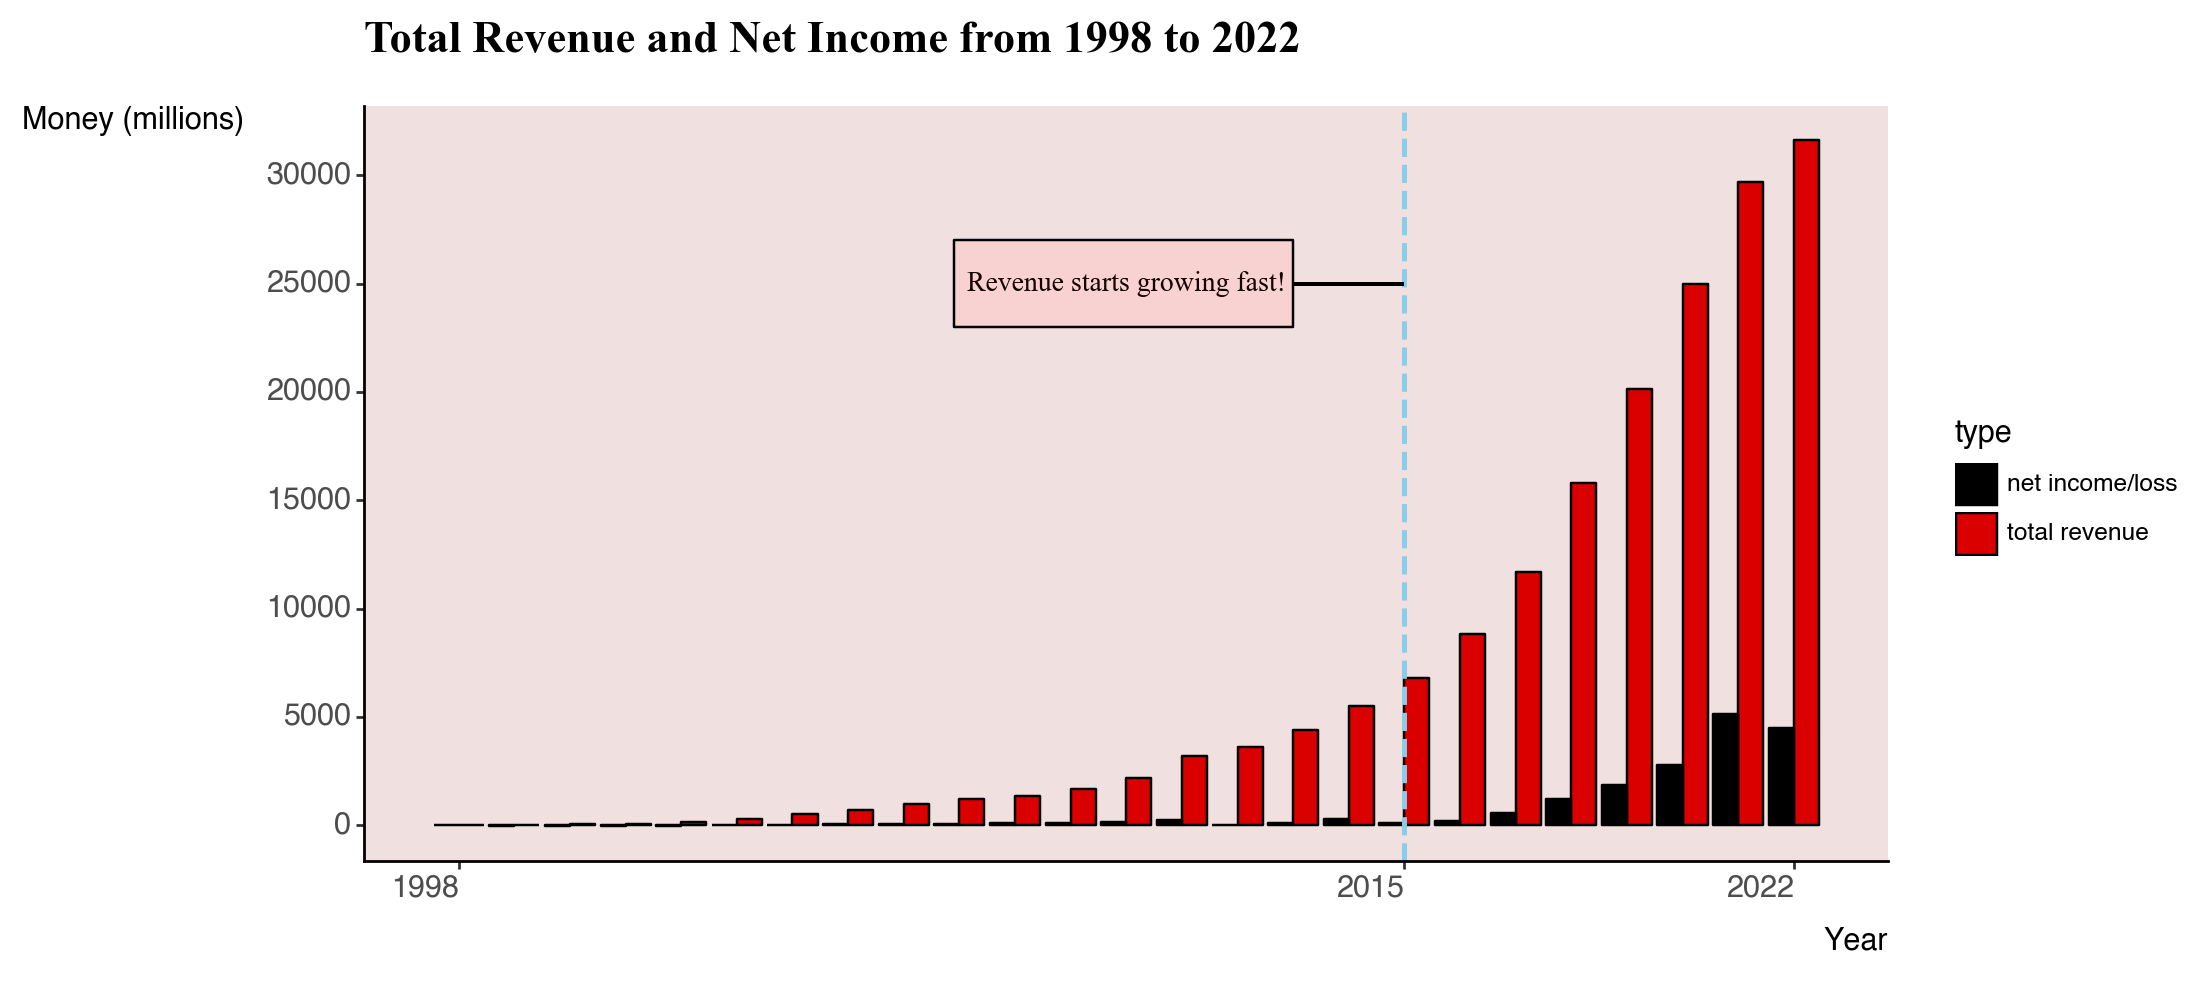

<Figure Size: (1100 x 500)>

In [767]:
revenue_plot = (
    ggplot(revenue,aes(x="year",y="amount",fill="type"))+
    geom_bar(stat="identity",position="dodge",color="black",width=.9)+
    theme_classic()+
    theme(figure_size=(11,5),
         axis_text_x=element_text(angle=0, hjust=1,size=11),
         axis_text_y=element_text(size=11),
         axis_title_x=element_text(hjust=1),
         axis_title_y=element_text(vjust=1,angle=0),
         plot_title=element_text(size=16, face="bold",family="Times New Roman"),
         panel_background=element_rect(fill="#f0e0df")
         )+
    scale_fill_manual(["black","#db0000"])+
    labs(y="Money (millions)",
         x="Year",
         title="Total Revenue and Net Income from 1998 to 2022")+
    scale_x_continuous( breaks=[1998, 2015, 2022],  
        labels=[1998, 2015, 2022])+
    scale_y_continuous(breaks=range(0,40000,5000))+
    geom_vline(xintercept=2015, color='skyblue', linetype='dashed', size=1)+
    annotate("rect",xmin=2006.9,xmax=2013,
              ymin=23000,ymax=27000,
              fill="#f7d2d0",
              color="black")+
    annotate("text", x=2010, y=25000, label="Revenue starts growing fast!", size=10, color="#130200",
             family="Times New Roman")+
    geom_segment(x=2013, y=25000, xend=2015, yend=25000, color="black", size=0.5)


)
revenue_plot


In [189]:
#ggsave(revenue_plot, "revenue_plot.png", dpi=300, width=10, height=5)

# Map of top 5 countries

In [768]:
top_continents = year_by_country.query("continent in ['North America', 'Europe', 'Asia']")

In [769]:
top_continents

,year_added,country,count,continent
0,2008.0,United States,2,North America
1,2009.0,Denmark,1,Europe
2,2009.0,United States,1,North America
3,2010.0,United States,1,North America
4,2011.0,France,2,Europe
...,...,...,...,...
464,2021.0,Turkey,26,Asia
465,2021.0,United Arab Emirates,4,Asia
466,2021.0,United Kingdom,120,Europe
467,2021.0,United States,627,North America


Referenced  https://www.statology.org/pandas-groupby-nlargest/ on how to pull the top 5 countries 

In [770]:
count_by_country = top_continents.groupby(['continent', 'country']).sum()

In [771]:
count_by_country

year_added  count
continent     country                         
Asia          Afghanistan        2017.0      1
              Armenia            2017.0      1
              Azerbaijan         2016.0      1
              Bangladesh         6058.0      4
              Cambodia          10095.0      6
...                                 ...    ...
North America Mexico            18149.0    169
              Nicaragua          2017.0      1
              Panama             2017.0      1
              Puerto Rico        2020.0      1
              United States     28203.0   3684

[89 rows x 2 columns]

In [780]:
top_5_countries = count_by_country.groupby('continent',group_keys=False).apply(lambda x: x.nlargest(5, 'count'))
top_5_countries.reset_index(inplace=True)

In [781]:
top_5_countries

,continent,country,year_added,count
0,Asia,India,12111.0,1046
1,Asia,Japan,14126.0,317
2,Asia,South Korea,12111.0,231
3,Asia,China,14126.0,162
4,Asia,Turkey,12111.0,113
5,Europe,United Kingdom,20164.0,805
6,Europe,France,16137.0,393
7,Europe,Spain,14122.0,232
8,Europe,Germany,14126.0,226
9,Europe,Italy,14126.0,100


Referenced https://plotly.com/python/map-configuration/

Link to plot since it cannot be seen in the notebook without the data: 
https://gitmebrandonhom.github.io/map.html

In [799]:

colors = ["#F6BDC0","#F1959B","#F07470","#EA4C46","#DC1C13"]

fig = px.choropleth(
    top_5_countries,
    locations="country",
    locationmode='country names',
    color="count",
    hover_name="country",
    animation_frame="continent",
    projection="robinson",
   color_continuous_scale=colors,)


fig.update_layout(
    title_text="Top 5 Countries Producing Content by Continent",
    title_font={"size": 22, "family": "Caslon","color":"red"},
    coloraxis_colorbar=dict(
        tickfont=dict(size=10,color="white"),
        title = "Total content produced",
    ), paper_bgcolor="black",
    font=dict(color="white")
)

fig.update_geos(resolution=110,
    showocean=True, oceancolor="black",
    showland=True,landcolor="#f2eeed",
    showframe=False, showcoastlines=True)




In [554]:
fig.write_html("map.html")